In [3]:
import pandas as pd
import numpy as np
import module_import
from src.quant_analysis.module_import import ETF_0050, stock_2330
df_0050 = ETF_0050()
df_2330 = stock_2330()
df = pd.merge(df_0050,df_2330,right_index=True,left_index=True,how="inner")
df.rename(columns={"Close_x": "0050", "Close_y": "2330"}, inplace=True)
df

[2024-08-30 11:26:35,224][log.log][INFO] 
Executing select_data_query
Args: ('stock_price', "stock_id ='0050' ORDER BY Date DESC LIMIT 500")
Kwargs: {}
Return: SELECT stock_id, Close, Open, High, Low, Volume, Date FROM stock_price WHERE stock_id ='0050' ORDER BY Date DESC LIMIT 500;

[2024-08-30 11:26:35,378][log.log][INFO] Query execution time: 0.09347319602966309 seconds.
[2024-08-30 11:26:35,399][log.log][INFO] 
Executing select_data_query
Args: ('stock_price', "stock_id ='2330' ORDER BY Date DESC LIMIT 500")
Kwargs: {}
Return: SELECT stock_id, Close, Open, High, Low, Volume, Date FROM stock_price WHERE stock_id ='2330' ORDER BY Date DESC LIMIT 500;

[2024-08-30 11:26:35,561][log.log][INFO] Query execution time: 0.12016510963439941 seconds.


,0050,2330
Date,,
2022-08-11,112.505,514.0
2022-08-12,113.208,517.0
2022-08-15,114.239,523.0
2022-08-16,114.426,525.0
2022-08-17,114.473,527.0
...,...,...
2024-08-23,180.950,949.0
2024-08-26,181.250,950.0
2024-08-27,180.450,942.0


# Log Return
## $$Y=ln(1+r)$$
### 可加性:
### $$ln(\frac{P_T}{P_0})=ln(\frac{P_T}{P_{T-1}})+ln(\frac{P_{T-1}}{P_{T-2}})+...+ln(\frac{P_1}{P_0})$$ 

In [4]:
lr = np.log(df).diff(1)
lr

,0050,2330
Date,,
2022-08-11,NaN,NaN
2022-08-12,0.006229,0.005820
2022-08-15,0.009066,0.011539
2022-08-16,0.001636,0.003817
2022-08-17,0.000411,0.003802
...,...,...
2024-08-23,0.000553,-0.002105
2024-08-26,0.001657,0.001053
2024-08-27,-0.004424,-0.008457


In [5]:
r=df.pct_change(1)
r

,0050,2330
Date,,
2022-08-11,NaN,NaN
2022-08-12,0.006249,0.005837
2022-08-15,0.009107,0.011605
2022-08-16,0.001637,0.003824
2022-08-17,0.000411,0.003810
...,...,...
2024-08-23,0.000553,-0.002103
2024-08-26,0.001658,0.001054
2024-08-27,-0.004414,-0.008421


<Axes: xlabel='Date'>

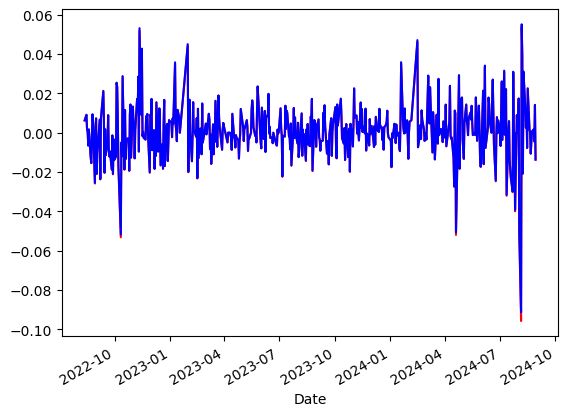

In [9]:
lr['0050'].plot(color="red")
r['0050'].plot(color="blue")

# 從log returns計算累計報酬
## $$TR=\frac{P_T}{P_0}-1$$
## $$=e^{ln(\frac{P_T}{P_0})}-1$$

In [10]:
tr = np.exp(np.cumsum(lr)) - 1
tr

,0050,2330
Date,,
2022-08-11,NaN,NaN
2022-08-12,0.006249,0.005837
2022-08-15,0.015413,0.017510
2022-08-16,0.017075,0.021401
2022-08-17,0.017493,0.025292
...,...,...
2024-08-23,0.608373,0.846304
2024-08-26,0.611040,0.848249
2024-08-27,0.603929,0.832685


<Axes: xlabel='Date'>

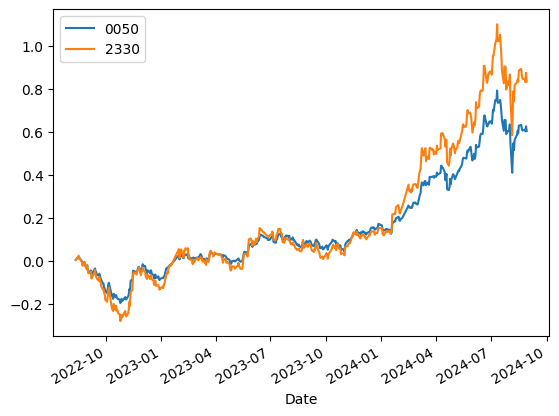

In [11]:
tr.plot()